Importing Liabrary

In [120]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

Loading data ...

In [121]:
data = pd.read_csv('train.csv')  

Data Exploration

<AxesSubplot:>

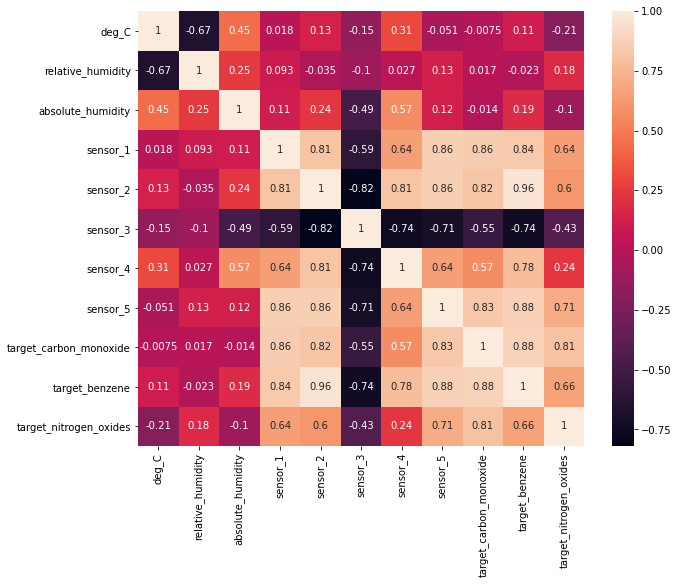

In [122]:
data.head() 

In [103]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB


In [104]:
month = pd.DatetimeIndex(data['date_time']).month

In [105]:
hour = pd.DatetimeIndex(data['date_time']).hour

In [106]:
print(hour)

Int64Index([18, 19, 20, 21, 22, 23,  0,  1,  2,  3,
            ...
            15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
           dtype='int64', name='date_time', length=7111)


In [107]:
data["month"]=month
data["hour"]=hour 
data.drop("date_time",axis=1,inplace =True) 
data.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,month,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,3,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,3,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,3,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,3,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,3,22


<AxesSubplot:>

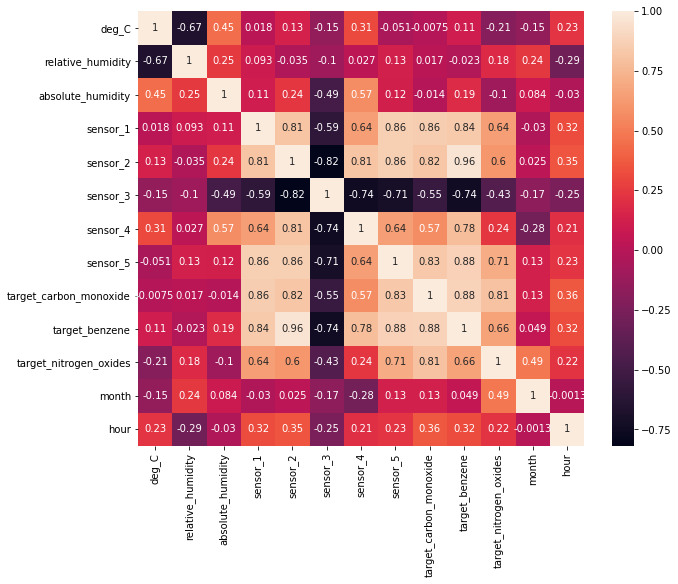

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True) 

In [109]:
data['deg_C'].nunique()

408

In [110]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = (q3-q1)*1.5

In [111]:
data = data[~((data<(q1-iqr))|(data>(q3+iqr))).any(axis=1)]

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 7110
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   deg_C                   6108 non-null   float64
 1   relative_humidity       6108 non-null   float64
 2   absolute_humidity       6108 non-null   float64
 3   sensor_1                6108 non-null   float64
 4   sensor_2                6108 non-null   float64
 5   sensor_3                6108 non-null   float64
 6   sensor_4                6108 non-null   float64
 7   sensor_5                6108 non-null   float64
 8   target_carbon_monoxide  6108 non-null   float64
 9   target_benzene          6108 non-null   float64
 10  target_nitrogen_oxides  6108 non-null   float64
 11  month                   6108 non-null   int64  
 12  hour                    6108 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 668.1 KB


deg_C


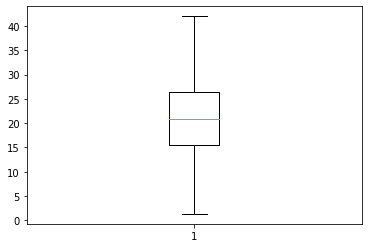

relative_humidity


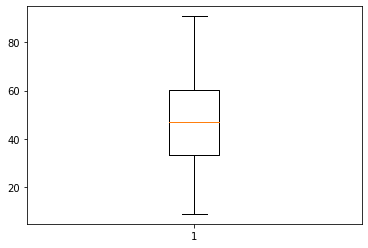

absolute_humidity


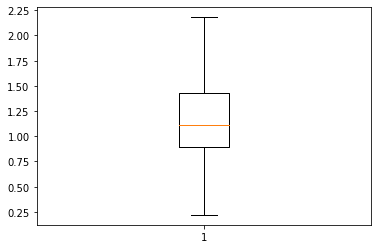

sensor_1


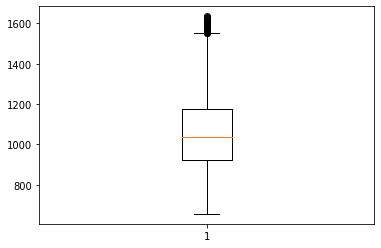

sensor_2


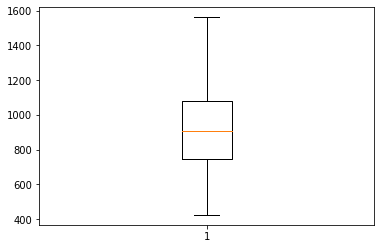

sensor_3


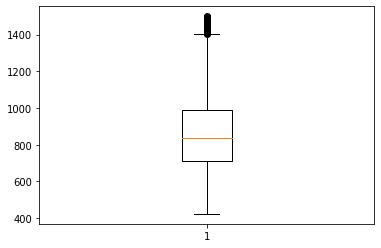

sensor_4


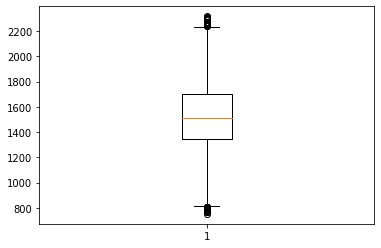

sensor_5


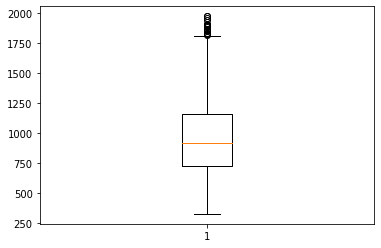

target_carbon_monoxide


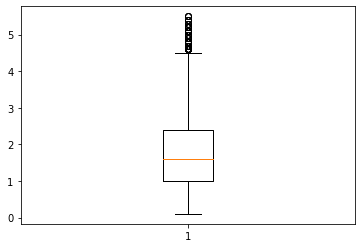

target_benzene


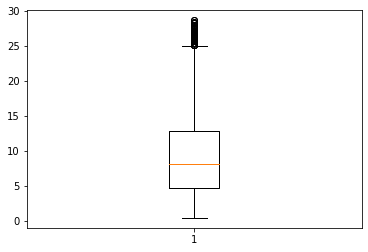

target_nitrogen_oxides


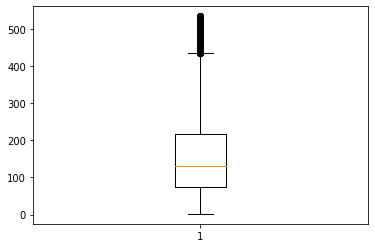

month


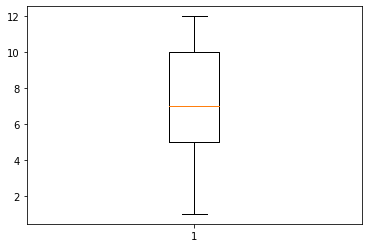

hour


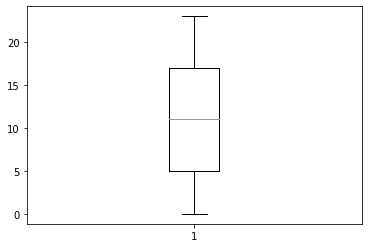

In [113]:
for i in data.columns:
    print(i)
    plt.boxplot(data[i])
    plt.show()

In [114]:
dp = ["target_carbon_monoxide","target_benzene","target_nitrogen_oxides"]
x = data.drop(dp,axis=1)
y = data[dp] 

In [115]:
x.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,month,hour
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,3,18
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,3,19
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,3,20
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,3,21
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,3,22


In [116]:
y.head()

,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2.5,12.0,167.7
1,2.1,9.9,98.9
2,2.2,9.2,127.1
3,2.2,9.7,177.2
4,1.5,6.4,121.8


In [117]:
nr = Normalizer()
x = nr.fit_transform(x)

In [118]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [119]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(4275, 10)
(4275, 3)
(1833, 10)
(1833, 3)
